In [1]:
import os
import sys
import numpy as np
import json
import subprocess
import operator
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
mutant_names = ['cWza','cWza-K375C','cWza-S355C','cWza-Y373C']

In [3]:
path = 'data/mutants_docking_pdbnames_labelled.json'
with open(path, 'r') as fp:
    mutants_docking_pdbnames_labelled = json.load(fp)

Error for model  ['0112\n']
Error for model  ['0243\n']
Error for model  ['0800\n']


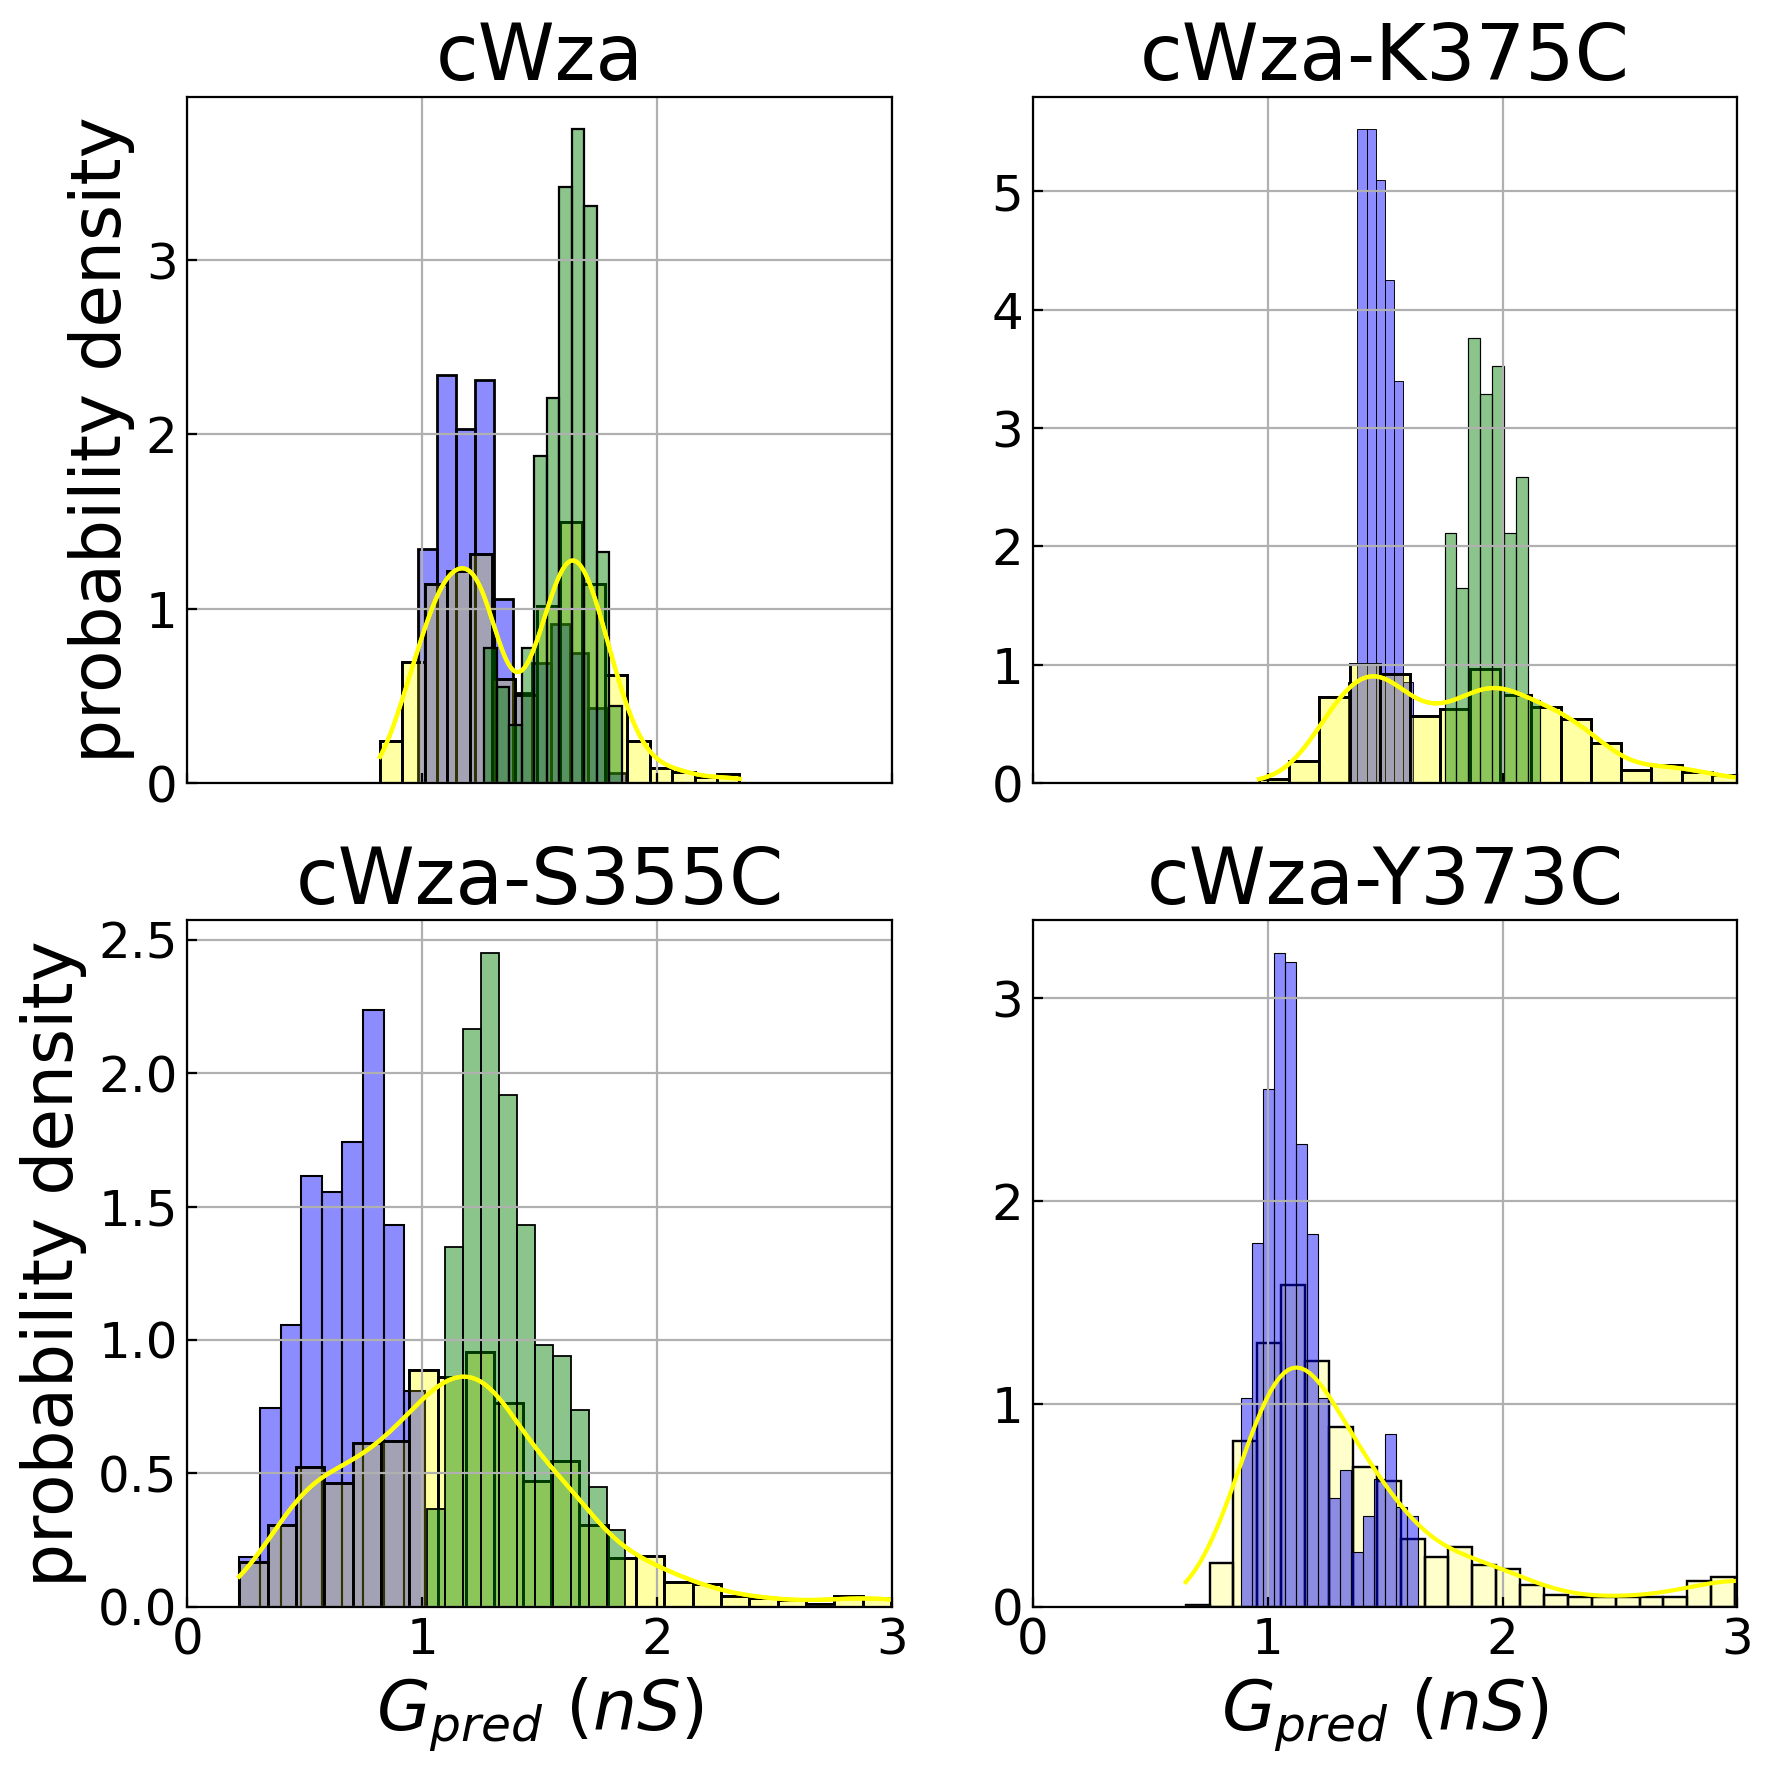

In [8]:
fig, ax = plt.subplots(2,2,figsize=(10,10),dpi=200, sharex=True)

Axes = {
    'cWza': ax[0][0],
    'cWza-K375C': ax[0][1],
    'cWza-S355C': ax[1][0],
    'cWza-Y373C': ax[1][1]
}

labels = {
    'cWza':("","probability density"),
    'cWza-K375C':("",""),
    'cWza-S355C':("$G_{pred}$ ($nS$)","probability density"),
    'cWza-Y373C':("$G_{pred}$ ($nS$)","")
}

Conformations = {
    'cWza': [0, 1],
    'cWza-K375C': [0, 1],
    'cWza-S355C': [0, 1],
    'cWza-Y373C': [0]    
}

Colors = {0:"blue", 1:'green'}

for mutant in mutant_names:
    #filter HOLE data per mutant
    filename = 'data/'+mutant+'_hole_1-1000.raw_dat'
    lines = [l.split(' (TAG') for l in open(filename,'r').readlines()]
    Gpred_data = {}
    for l in lines:
        try:
            model_number, data_raw = l
            Gpred  = 0.001*float(data_raw.split("Gpred=")[-1].strip().split()[0])
            Gpred_data[model_number] = Gpred

        except:
            print("Error for model ",l)
    
    ax = Axes[mutant]
    
    #filter data for PDBs within HPRs
    for g in Conformations[mutant]:
        model_numbers = [pdbname.split('_')[3] for pdbname in mutants_docking_pdbnames_labelled[mutant][str(g)]]
        
        models_labelled_Gpred  = []
        for x in model_numbers:
            try:
                models_labelled_Gpred.append(Gpred_data[x])
            except: KeyError

        dataset = list(Gpred_data.values())
        sns.histplot(dataset,stat='density',kde=True,ax=ax,color='yellow',alpha=0.2)
        
        c = Colors[g]
        dataset = models_labelled_Gpred
        sns.histplot(dataset,stat='density',ax=ax,color=c,alpha=0.45)

    ax.set_xlim(0,3)
    ax.grid(True)
    
    # customise plot
    ax.set_title(mutant, fontsize=28)
    ax.tick_params(axis='both',direction='in',labelsize=18)
    l1,l2 = labels[mutant]
    ax.set_xlabel(l1,fontsize=25)
    ax.set_ylabel(l2,fontsize=25)
    
plt.show()

APPENDIX

In [22]:
mutant = mutant_names[2]
filename = 'data/'+mutant+'_hole_1-1000.raw_dat'
lines = [l.split(' (TAG') for l in open(filename,'r').readlines()]

In [23]:
Gmacro_data = {}
Gpred_data = {}
for l in lines:
    try:
        model_number, data_raw = l
        
        Gmacro = 0.001*float(data_raw.split("Gmacro=")[-1].strip().split()[0])
        Gmacro_data[model_number] = Gmacro
        
        Gpred  = 0.001*float(data_raw.split("Gpred=")[-1].strip().split()[0])
        Gpred_data[model_number] = Gpred
    
    except:
        print("Error for model ",l)

<AxesSubplot:ylabel='Density'>

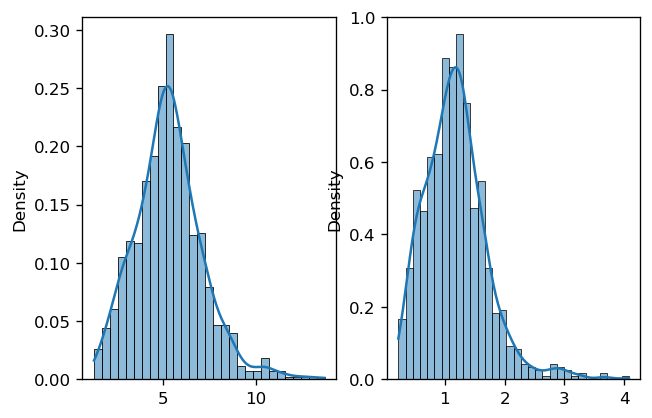

In [24]:
fig,ax = plt.subplots(1,2,dpi=120)

dataset = list(Gmacro_data.values())
sns.histplot(dataset,stat='density',kde=True,ax=ax[0])

dataset = list(Gpred_data.values())
sns.histplot(dataset,stat='density',kde=True,ax=ax[1])

In [29]:
model_numbers = [pdbname.split('_')[3] for pdbname in mutants_docking_pdbnames_labelled[mutant]['1']]

In [30]:
models_labelled_Gpred  = []
models_labelled_Gmacro = []
for x in model_numbers:
    try:
        models_labelled_Gpred.append(Gpred_data[x])
        models_labelled_Gmacro.append(Gmacro_data[x])
    except: KeyError

<AxesSubplot:ylabel='Density'>

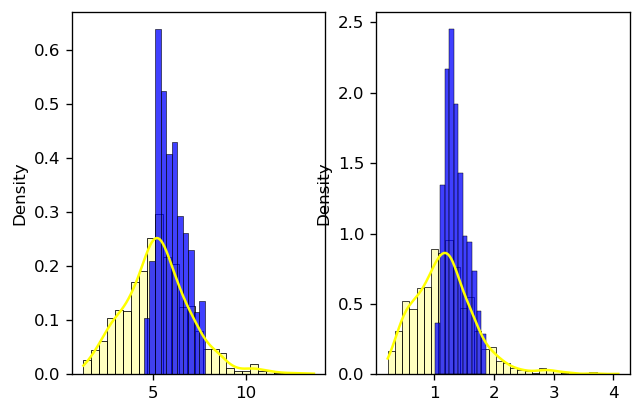

In [31]:
fig,ax = plt.subplots(1,2,dpi=120)

dataset = list(Gmacro_data.values())
sns.histplot(dataset,stat='density',kde=True,ax=ax[0], color='yellow',alpha=0.25)

dataset = models_labelled_Gmacro
sns.histplot(dataset,stat='density',ax=ax[0],color='blue')

dataset = list(Gpred_data.values())
sns.histplot(dataset,stat='density',kde=True,ax=ax[1], color='yellow',alpha=0.25)

dataset = models_labelled_Gpred
sns.histplot(dataset,stat='density',ax=ax[1],color='blue')

<AxesSubplot:ylabel='Density'>

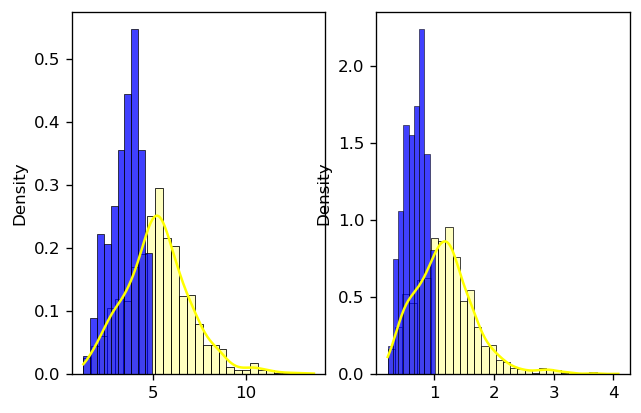

In [28]:
fig,ax = plt.subplots(1,2,dpi=120)

dataset = list(Gmacro_data.values())
sns.histplot(dataset,stat='density',kde=True,ax=ax[0], color='yellow',alpha=0.25)

dataset = models_labelled_Gmacro
sns.histplot(dataset,stat='density',ax=ax[0],color='blue')

dataset = list(Gpred_data.values())
sns.histplot(dataset,stat='density',kde=True,ax=ax[1], color='yellow',alpha=0.25)

dataset = models_labelled_Gpred
sns.histplot(dataset,stat='density',ax=ax[1],color='blue')